# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

data = pd.read_csv(url, names=names)
for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)


X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
# Creating a model with sklearn's decision DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=5)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.8
Validation Accuracy is  77.77777777777779


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=2, min_samples_leaf=10)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  80.80000000000001
Validation Accuracy is  77.77777777777779


Explain the accuracy results below. 

(YOUR ANSWER HERE)

## Metrics

Plot the ROC curve and print the AUC of the second model.

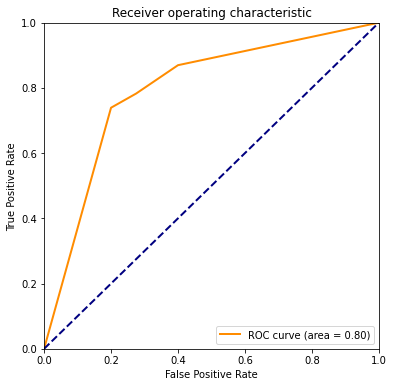

In [ ]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = decision_tree.predict_proba(X_val,labels)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
roc_auc

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')
   preg   plas  pres  skin   test  mass   pedi  age  class
0     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
1     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
2     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
3     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
4     1  189.0  60.0  23.0  846.0  30.1  0.398   59      1


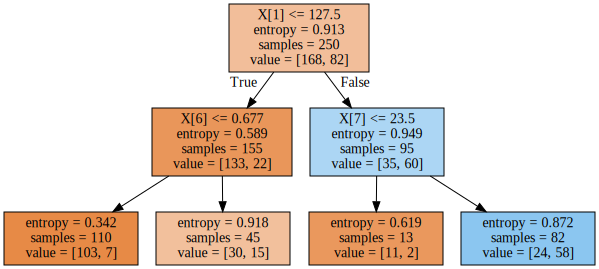

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)
print(data.columns)
print(data.head(5))

graph = graphviz.Source(dot_data)
graph


#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)

The nth feature

Question 2: What is the root feature? Does it make sense as the root feature?

(YOUR ANSWER HERE)

X[1] is plasticity

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

(YOUR ANSWER HERE)

It would overfit the data

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100) ## number of trees

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  74.60317460317461


How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
list(map(list, zip(sorted_features, names[:-1])))

In [ ]:
## YOUR CODE HERE
rank = random_forest.feature_importances_.argsort()

print(rank)
print(names[:-1])
sorted_features = sorted(list(map(list, zip(rank, names[:-1]))))
sorted_features = [row[1] for row in sorted_features]

print(sorted_features)

[2 0 3 6 5 7 4 1]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
['plas', 'age', 'preg', 'pres', 'pedi', 'test', 'skin', 'mass']


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

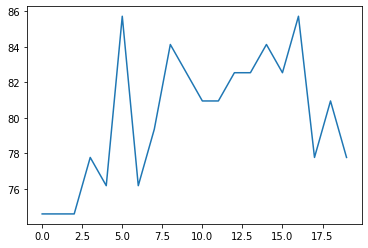

In [ ]:
## YOUR CODE HERE
#trees = np.linspace(5, 100, num= 20)
trees_1= range(1,100,5)
accuracies = []
for tree in trees_1:
    random_forest = RandomForestClassifier(n_estimators=tree)

    # Training/fitting the model with training data
    random_forest.fit(X_train, y_train)

    y_val_pred=random_forest.predict(X_val)
    temp_accu=accuracy_score(y_val,y_val_pred)*100

    accuracies.append(temp_accu)


plt.plot(accuracies)
plt.show()

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

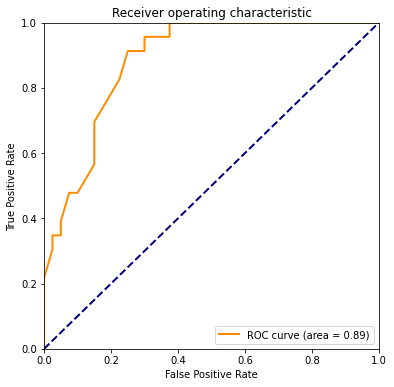

In [ ]:
## YOUR CODE HERE

y_val_prob = random_forest.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
roc_auc

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=783c3aa1-1225-4605-b690-395c43d54391' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>